In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras import utils as np_utils
from keras import layers
from keras import utils
import tensorflow_addons as tfa
from keras.metrics import Precision
from keras.metrics import Recall
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Flatten
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import SpatialDropout1D
from keras.layers import LSTM
from sklearn.utils import shuffle
import xgboost as xgb

In [2]:
malware = pd.read_csv("Malware/Malware.csv")

C:\Users\Vladislav\AppData\Local\Temp\ipykernel_25608\233872696.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  malware = pd.read_csv("Malware/Malware.csv")


In [3]:
malware

,ID,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate,Unnamed: 57
0,1,b69acb3bb133974e48229627663f96d4,332,224,8450,8.0,0,16896,8192,0,...,3.492126,3.492126,3.492126,864.000000,864.0,864,72,0,1,NaN
1,2,1cbee4b3725629bd0aa6ac2ff500925f,332,224,258,9.0,0,84480,25600,0,...,3.486827,3.486827,3.486827,892.000000,892.0,892,72,0,1,NaN
2,3,b7027cf0cd31c820928950cbfe7e91ef,332,224,8450,8.0,0,4608,3584,0,...,3.517270,3.517270,3.517270,952.000000,952.0,952,72,0,1,NaN
3,4,156a0bb069f94d1e7c2508318805f2a4,332,224,8450,10.0,0,108544,15872,0,...,3.270559,3.034188,3.506931,1032.000000,972.0,1092,72,0,1,NaN
4,5,c72bf851fed5542abba904b1f3944cd5,332,224,8226,48.0,0,513024,2048,0,...,3.420977,3.420977,3.420977,954.000000,954.0,954,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216347,216348,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11.0,0,205824,223744,0,...,4.122736,1.370260,7.677091,14900.714286,16.0,81654,72,0,0,NaN
216348,216349,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2.0,25,37888,185344,0,...,3.377663,2.031619,5.050074,6905.846154,44.0,67624,0,15,0,NaN
216349,216350,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10.0,0,118272,380416,0,...,6.825406,2.617026,7.990487,14981.909091,48.0,22648,72,14,0,NaN
216350,216351,4286dccf67ca220fe67635388229a9f3,332,224,33166,2.0,25,49152,16896,0,...,3.421627,2.060964,4.739744,601.600000,16.0,2216,0,0,0,NaN


In [6]:
malware.drop(['ID','md5','Unnamed: 57'], axis=1, inplace=True)

KeyError: "['ID', 'md5', 'Unnamed: 57'] not found in axis"

In [7]:
malware

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,332,224,8450,8.0,0,16896,8192,0,16947,4096,...,1,3.492126,3.492126,3.492126,864.000000,864.0,864,72,0,1
1,332,224,258,9.0,0,84480,25600,0,10973,4096,...,1,3.486827,3.486827,3.486827,892.000000,892.0,892,72,0,1
2,332,224,8450,8.0,0,4608,3584,0,6452,4096,...,1,3.517270,3.517270,3.517270,952.000000,952.0,952,72,0,1
3,332,224,8450,10.0,0,108544,15872,0,105021,4096,...,2,3.270559,3.034188,3.506931,1032.000000,972.0,1092,72,0,1
4,332,224,8226,48.0,0,513024,2048,0,520922,8192,...,1,3.420977,3.420977,3.420977,954.000000,954.0,954,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216347,332,224,258,11.0,0,205824,223744,0,123291,4096,...,7,4.122736,1.370260,7.677091,14900.714286,16.0,81654,72,0,0
216348,332,224,33167,2.0,25,37888,185344,0,40000,4096,...,26,3.377663,2.031619,5.050074,6905.846154,44.0,67624,0,15,0
216349,332,224,258,10.0,0,118272,380416,0,59610,4096,...,22,6.825406,2.617026,7.990487,14981.909091,48.0,22648,72,14,0
216350,332,224,33166,2.0,25,49152,16896,0,51216,4096,...,10,3.421627,2.060964,4.739744,601.600000,16.0,2216,0,0,0


In [8]:
malware.replace([np.inf, -np.inf], np.nan, inplace=True)

In [9]:
malware = malware.dropna()

In [10]:
malware = shuffle(malware)

In [11]:
malware

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
141335,332,224,258,11.0,0,113664,682496,0,24735,4096,...,7,4.453368,2.623078,7.967002,80992.857143,62.0,534528,0,0,0
45366,332,224,271,7.0,0,60416,480256,0,34598,4096,...,90,3.164771,1.021274,6.658114,5164.977778,20.0,171100,0,0,0
195260,332,224,783,2.0,56,30720,14848,154624,14348,4096,...,8,4.091269,2.458492,5.869969,2088.750000,48.0,9640,0,0,0
175645,332,224,258,8.0,0,7680,307200,0,5339,4096,...,6,3.402385,2.097487,5.155409,1314.166667,48.0,3752,0,23,0
11516,332,224,8450,9.0,0,13312,8704,0,16107,4096,...,2,4.223314,3.425933,5.020695,729.000000,598.0,860,72,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23291,332,224,8450,8.0,0,212992,335872,0,200142,4096,...,1,3.544948,3.544948,3.544948,880.000000,880.0,880,72,0,1
197209,332,224,33167,2.0,25,524288,28672,888832,1416352,892928,...,259,4.735701,0.000000,7.920188,2386.598456,16.0,206742,0,18,0
130924,332,224,783,2.0,56,29184,14848,110592,14764,4096,...,8,4.091269,2.458492,5.869969,2088.750000,48.0,9640,0,0,0
118276,332,224,8450,9.0,0,512,1536,0,4207,4096,...,1,3.565307,3.565307,3.565307,908.000000,908.0,908,0,16,1


In [12]:
malware['legitimate'].value_counts()

0    140849
1     75502
Name: legitimate, dtype: int64

In [10]:
malware = malware.reset_index()

In [11]:
malware = malware.drop(['index'], axis=1)

In [12]:
malware

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,332,224,258,10.0,0,117760,392192,0,58906,4096,...,5,3.425849,2.458492,4.035538,3146.400000,48.0,9640,72,15,0
1,332,224,259,9.0,0,74752,22528,0,44167,4096,...,18,3.270714,1.971335,5.217246,697.666667,34.0,2998,0,16,0
2,332,224,783,7.0,10,12288,4096,28672,12532,32768,...,0,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0
3,332,224,8462,7.0,0,0,5120,0,0,4096,...,1,3.519572,3.519572,3.519572,900.000000,900.0,900,0,16,1
4,34404,240,34,14.0,10,14336,18432,0,16400,4096,...,3,3.708816,2.689284,4.938219,613.333333,200.0,960,256,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216346,332,224,8462,8.0,0,450560,8192,0,457886,8192,...,1,3.539350,3.539350,3.539350,1088.000000,1088.0,1088,0,18,1
216347,332,224,8450,8.0,0,1024,2048,0,8942,8192,...,1,3.558226,3.558226,3.558226,1292.000000,1292.0,1292,0,18,1
216348,332,224,258,10.0,0,118784,382464,0,59786,4096,...,26,6.974856,2.458492,7.990358,12792.961538,48.0,20335,72,15,0
216349,332,224,258,10.0,0,31232,282112,0,5494,4096,...,6,4.784920,2.458492,5.696847,43874.166667,48.0,247808,72,0,0


In [13]:
malware = malware.drop(['Machine'], axis=1)

In [14]:
malware_data = malware.drop(['legitimate'], axis=1)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
malware_scaled = pd.DataFrame(scaler.fit_transform(malware_data))

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

# Chi_square feature selection

In [18]:
bestfeatures = SelectKBest(score_func=chi2, k=20)

In [19]:
fit_feat = bestfeatures.fit(malware_scaled, malware['legitimate'])

In [20]:
malware_scores = pd.DataFrame(fit_feat.scores_)
malware_columns = pd.DataFrame(malware_scaled.columns)

In [21]:
featureScores = pd.concat([malware_columns, malware_scores],axis=1)
featureScores.columns = ['Specs','Score']

In [22]:
print(featureScores.nlargest(20, 'Score'))

    Specs         Score
23     23  10285.818917
21     21   3190.340238
1       1   2987.899315
33     33   1301.058610
47     47   1282.168947
46     46   1070.573703
17     17    813.731644
52     52    610.707103
31     31    582.777707
3       3    428.536642
32     32    389.225729
22     22    347.613734
15     15    317.885149
16     16    290.498051
43     43    258.081053
42     42    138.408542
35     35    127.392942
38     38    103.853904
44     44    101.951695
30     30     92.290655


In [23]:
bestfeatures_list = featureScores.nlargest(20,'Score')['Specs']

In [24]:
bestfeatures_list = bestfeatures_list.tolist()

In [25]:
bestfeatures_list

[23, 21, 1, 33, 47, 46, 17, 52, 31, 3, 32, 22, 15, 16, 43, 42, 35, 38, 44, 30]

In [26]:
malware['legitimate_name'] = np.where(malware['legitimate']==1, 'malware', 'benign')

In [27]:
malware_full = pd.concat([malware_scaled, malware['legitimate'], malware['legitimate_name']], axis=1)

In [28]:
malware_full

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,legitimate,legitimate_name
0,0.272727,0.005207,0.000302,0.000000,2.741814e-05,9.131432e-05,0.000000,0.000014,0.000002,0.000064,...,0.023957,0.307322,0.504442,7.325894e-07,1.117604e-08,2.244521e-06,1.676381e-08,0.576923,0,benign
1,0.272727,0.005227,0.000271,0.000000,1.740456e-05,5.245209e-06,0.000000,0.000011,0.000002,0.000043,...,0.022872,0.246425,0.652156,1.624406e-07,7.916361e-09,6.980368e-07,0.000000e+00,0.615385,0,benign
2,0.272727,0.015802,0.000211,0.039216,2.861023e-06,9.536743e-07,0.000007,0.000003,0.000012,0.000023,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,benign
3,0.272727,0.170774,0.000211,0.000000,0.000000e+00,1.192093e-06,0.000000,0.000000,0.000002,0.000002,...,0.024612,0.439962,0.439947,2.095507e-07,2.095507e-07,2.095507e-07,0.000000e+00,0.615385,1,malware
4,0.363636,0.000686,0.000422,0.039216,3.337860e-06,4.291534e-06,0.000000,0.000004,0.000002,0.000000,...,0.025936,0.336172,0.617277,1.428049e-07,4.656683e-08,2.235208e-07,5.960464e-08,0.000000,1,malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216346,0.272727,0.170774,0.000241,0.000000,1.049042e-04,1.907349e-06,0.000000,0.000111,0.000003,0.000239,...,0.024751,0.442434,0.442419,2.533236e-07,2.533236e-07,2.533236e-07,0.000000e+00,0.692308,1,malware
216347,0.272727,0.170531,0.000241,0.000000,2.384186e-07,4.768372e-07,0.000000,0.000002,0.000003,0.000009,...,0.024883,0.444794,0.444778,3.008217e-07,3.008217e-07,3.008217e-07,0.000000e+00,0.692308,1,malware
216348,0.272727,0.005207,0.000302,0.000000,2.765656e-05,8.904934e-05,0.000000,0.000014,0.000002,0.000064,...,0.048775,0.307322,0.998795,2.978638e-06,1.117604e-08,4.734682e-06,1.676381e-08,0.576923,0,benign
216349,0.272727,0.005207,0.000302,0.000000,7.271767e-06,6.568432e-05,0.000000,0.000001,0.000002,0.000019,...,0.033461,0.307322,0.712106,1.021540e-05,1.117604e-08,5.769816e-05,1.676381e-08,0.000000,0,benign


In [29]:
%matplotlib inline

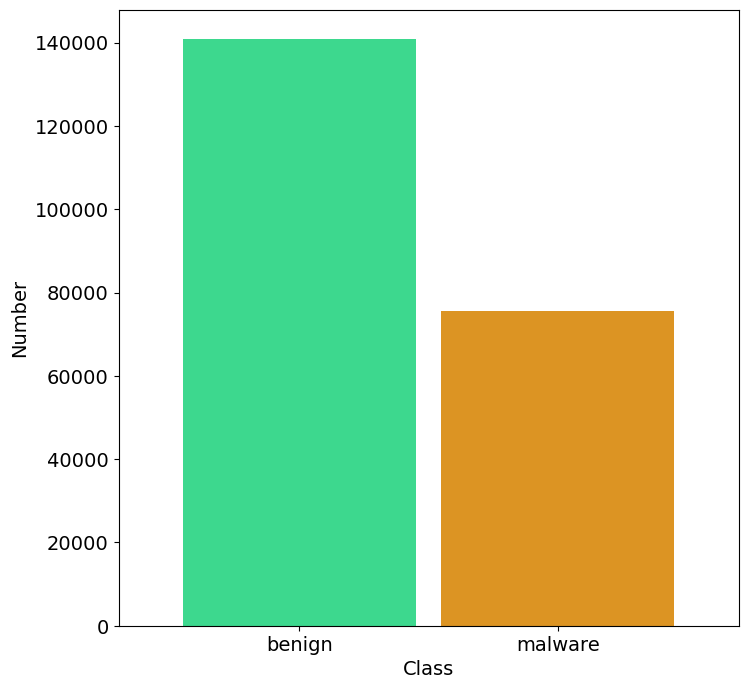

In [32]:
plt.figure(figsize=[8,8])
malware_full.legitimate_name.value_counts().plot(kind='bar', width=0.9, color=['#3DD88E','#DC9423'])
plt.xlabel('Class',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.xticks(rotation='horizontal', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [33]:
X = malware_full[bestfeatures_list]
y = malware_full['legitimate']

In [34]:
X

,23,21,1,33,47,46,17,52,31,3,32,22,15,16,43,42,35,38,44,30
0,0.617313,0.000120,0.005207,0.995419,0.504442,0.307322,0.5,0.576923,0.699658,0.000000,0.482354,0.1250,0.000000,0.000000,0.000000,0.00000,0.000335,3.218546e-04,0.000609,0.041667
1,0.635224,0.000055,0.005227,0.819444,0.652156,0.246425,0.5,0.615385,0.500278,0.000000,0.049276,0.1250,0.000000,0.000000,0.000000,0.00029,0.000018,1.103423e-06,0.002191,0.041667
2,0.019104,0.000000,0.015802,0.930547,0.000000,0.000000,0.4,0.000000,0.586150,0.039216,0.290683,0.1250,0.000000,0.000000,0.000000,0.00000,0.000018,1.412381e-04,0.000000,0.031250
3,0.000000,0.000016,0.170774,0.511587,0.439947,0.439962,0.5,0.615385,0.420314,0.000000,0.335265,0.0625,0.000078,0.000016,0.000042,0.00000,0.000018,7.172248e-06,0.000122,0.020833
4,0.923582,0.000012,0.000686,0.766119,0.617277,0.336172,1.0,0.000000,0.402197,0.039216,0.117226,0.1875,0.000155,0.000000,0.000000,0.00000,0.000018,2.758557e-06,0.000365,0.052083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216346,0.025075,0.000121,0.170774,0.716087,0.442419,0.442434,0.4,0.692308,0.291645,0.000000,0.002051,0.1875,0.000000,0.000000,0.000000,0.00000,0.000141,4.137835e-07,0.000122,0.020833
216347,0.636418,0.000016,0.170531,0.547908,0.444778,0.444794,0.4,0.692308,0.319758,0.000000,0.010194,0.1875,0.000000,0.000000,0.000000,0.00000,0.000018,4.137835e-07,0.000122,0.020833
216348,0.617313,0.000128,0.005207,0.995354,0.998795,0.307322,0.5,0.576923,0.704203,0.000000,0.510197,0.1250,0.000000,0.000000,0.000000,0.00000,0.000335,3.226822e-04,0.003165,0.041667
216349,0.617313,0.469897,0.005207,0.812797,0.712106,0.307322,0.5,0.000000,0.577144,0.000000,0.263153,0.1250,0.000000,0.000000,0.000000,0.00000,0.000141,1.366865e-04,0.000730,0.041667


In [35]:
y

0         0
1         0
2         0
3         1
4         1
         ..
216346    1
216347    1
216348    0
216349    0
216350    0
Name: legitimate, Length: 216351, dtype: int64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
matrix_labels = ['malware','benign']

In [38]:
algorithms = ['Naive Bayes','Logistic Regression','Decision tree','Random Forest','XGBoost','CatBoost']

In [39]:
metrics_list = []

In [40]:
classifiers = [MultinomialNB(), LogisticRegression(), DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None), 
RandomForestClassifier(n_estimators = 10), xgb.XGBClassifier(random_state=42), CatBoostClassifier(task_type="GPU", devices='0:1')]

In [41]:
k = 0
for i in classifiers:
    i.fit(x_train, y_train)        
    y_pred = i.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    metrics_list.append({'Accuracy': accuracy,
                        'Precision': precision,
                        'Recall': recall,
                        'F1-score': f1,
                        'fpr': fpr,
                        'tpr': tpr})
        
    print("Evaluation metrics of " + algorithms[k]+" algorithm: ")
    print('Accuracy: ', accuracy)  
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1-score: ', f1)
    
    k = k + 1  

Evaluation metrics of Naive Bayes algorithm: 
Accuracy:  0.6476134717899732
Precision:  0.42918825561312607
Recall:  0.021886559802712702
F1-score:  0.04164920807843795


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation metrics of Logistic Regression algorithm: 
Accuracy:  0.9246140572520261
Precision:  0.9129003847401845
Recall:  0.8672714461863661
F1-score:  0.8895011404439829
Evaluation metrics of Decision tree algorithm: 
Accuracy:  0.9815271315440791
Precision:  0.9751690010162153
Recall:  0.9719482120838471
F1-score:  0.9735559427449769
Evaluation metrics of Random Forest algorithm: 
Accuracy:  0.987566634825748
Precision:  0.9860624084513294
Recall:  0.978289589571957
F1-score:  0.9821606207308177
Evaluation metrics of XGBoost algorithm: 
Accuracy:  0.9873663451761008
Precision:  0.9828803388633957
Recall:  0.9809758675356702
F1-score:  0.9819271797584413
Learning rate set to 0.025578
0:	learn: 0.6486267	total: 14.1ms	remaining: 14.1s
1:	learn: 0.6052140	total: 27.6ms	remaining: 13.8s
2:	learn: 0.5676144	total: 41.4ms	remaining: 13.8s
3:	learn: 0.5306723	total: 52.8ms	remaining: 13.1s
4:	learn: 0.4998674	total: 69.1ms	remaining: 13.7s
5:	learn: 0.4689601	total: 82.8ms	remaining: 13.7

165:	learn: 0.0827428	total: 1.55s	remaining: 7.81s
166:	learn: 0.0825899	total: 1.56s	remaining: 7.79s
167:	learn: 0.0824541	total: 1.57s	remaining: 7.78s
168:	learn: 0.0823552	total: 1.58s	remaining: 7.76s
169:	learn: 0.0821792	total: 1.58s	remaining: 7.74s
170:	learn: 0.0819541	total: 1.59s	remaining: 7.72s
171:	learn: 0.0817793	total: 1.6s	remaining: 7.71s
172:	learn: 0.0816306	total: 1.61s	remaining: 7.7s
173:	learn: 0.0814901	total: 1.62s	remaining: 7.68s
174:	learn: 0.0813412	total: 1.63s	remaining: 7.67s
175:	learn: 0.0811828	total: 1.63s	remaining: 7.65s
176:	learn: 0.0810298	total: 1.64s	remaining: 7.64s
177:	learn: 0.0808653	total: 1.65s	remaining: 7.62s
178:	learn: 0.0807592	total: 1.66s	remaining: 7.61s
179:	learn: 0.0806192	total: 1.67s	remaining: 7.59s
180:	learn: 0.0805143	total: 1.67s	remaining: 7.58s
181:	learn: 0.0803690	total: 1.68s	remaining: 7.56s
182:	learn: 0.0802304	total: 1.69s	remaining: 7.54s
183:	learn: 0.0801084	total: 1.7s	remaining: 7.53s
184:	learn: 0.0

337:	learn: 0.0662235	total: 3.25s	remaining: 6.38s
338:	learn: 0.0661578	total: 3.27s	remaining: 6.37s
339:	learn: 0.0660832	total: 3.28s	remaining: 6.36s
340:	learn: 0.0660164	total: 3.29s	remaining: 6.36s
341:	learn: 0.0659781	total: 3.3s	remaining: 6.35s
342:	learn: 0.0659186	total: 3.31s	remaining: 6.34s
343:	learn: 0.0658760	total: 3.32s	remaining: 6.34s
344:	learn: 0.0658337	total: 3.33s	remaining: 6.33s
345:	learn: 0.0657808	total: 3.34s	remaining: 6.32s
346:	learn: 0.0657348	total: 3.36s	remaining: 6.32s
347:	learn: 0.0656913	total: 3.37s	remaining: 6.31s
348:	learn: 0.0656580	total: 3.38s	remaining: 6.3s
349:	learn: 0.0656099	total: 3.39s	remaining: 6.29s
350:	learn: 0.0655490	total: 3.4s	remaining: 6.29s
351:	learn: 0.0654566	total: 3.41s	remaining: 6.29s
352:	learn: 0.0654080	total: 3.42s	remaining: 6.28s
353:	learn: 0.0653572	total: 3.44s	remaining: 6.27s
354:	learn: 0.0653045	total: 3.44s	remaining: 6.26s
355:	learn: 0.0652473	total: 3.45s	remaining: 6.25s
356:	learn: 0.0

516:	learn: 0.0575835	total: 4.9s	remaining: 4.58s
517:	learn: 0.0575389	total: 4.91s	remaining: 4.57s
518:	learn: 0.0575020	total: 4.92s	remaining: 4.56s
519:	learn: 0.0574687	total: 4.93s	remaining: 4.55s
520:	learn: 0.0574428	total: 4.94s	remaining: 4.54s
521:	learn: 0.0573920	total: 4.95s	remaining: 4.53s
522:	learn: 0.0573573	total: 4.96s	remaining: 4.52s
523:	learn: 0.0573084	total: 4.97s	remaining: 4.51s
524:	learn: 0.0572654	total: 4.98s	remaining: 4.5s
525:	learn: 0.0572301	total: 4.99s	remaining: 4.49s
526:	learn: 0.0571996	total: 4.99s	remaining: 4.48s
527:	learn: 0.0571653	total: 5s	remaining: 4.47s
528:	learn: 0.0571188	total: 5.01s	remaining: 4.46s
529:	learn: 0.0570640	total: 5.01s	remaining: 4.45s
530:	learn: 0.0569946	total: 5.02s	remaining: 4.43s
531:	learn: 0.0569580	total: 5.03s	remaining: 4.42s
532:	learn: 0.0569225	total: 5.04s	remaining: 4.41s
533:	learn: 0.0568850	total: 5.04s	remaining: 4.4s
534:	learn: 0.0568402	total: 5.05s	remaining: 4.39s
535:	learn: 0.0567

678:	learn: 0.0520961	total: 6.36s	remaining: 3.01s
679:	learn: 0.0520589	total: 6.37s	remaining: 3s
680:	learn: 0.0520296	total: 6.38s	remaining: 2.99s
681:	learn: 0.0519913	total: 6.38s	remaining: 2.98s
682:	learn: 0.0519771	total: 6.39s	remaining: 2.97s
683:	learn: 0.0519409	total: 6.4s	remaining: 2.96s
684:	learn: 0.0519114	total: 6.41s	remaining: 2.95s
685:	learn: 0.0518824	total: 6.42s	remaining: 2.94s
686:	learn: 0.0518500	total: 6.43s	remaining: 2.93s
687:	learn: 0.0517965	total: 6.44s	remaining: 2.92s
688:	learn: 0.0517871	total: 6.45s	remaining: 2.91s
689:	learn: 0.0517677	total: 6.46s	remaining: 2.9s
690:	learn: 0.0517507	total: 6.46s	remaining: 2.89s
691:	learn: 0.0517209	total: 6.47s	remaining: 2.88s
692:	learn: 0.0516908	total: 6.49s	remaining: 2.87s
693:	learn: 0.0516487	total: 6.49s	remaining: 2.86s
694:	learn: 0.0516280	total: 6.51s	remaining: 2.85s
695:	learn: 0.0516123	total: 6.52s	remaining: 2.85s
696:	learn: 0.0515827	total: 6.53s	remaining: 2.84s
697:	learn: 0.051

838:	learn: 0.0482027	total: 8.06s	remaining: 1.54s
839:	learn: 0.0481932	total: 8.07s	remaining: 1.54s
840:	learn: 0.0481691	total: 8.08s	remaining: 1.53s
841:	learn: 0.0481482	total: 8.09s	remaining: 1.52s
842:	learn: 0.0481368	total: 8.11s	remaining: 1.51s
843:	learn: 0.0481231	total: 8.12s	remaining: 1.5s
844:	learn: 0.0481096	total: 8.13s	remaining: 1.49s
845:	learn: 0.0480892	total: 8.14s	remaining: 1.48s
846:	learn: 0.0480586	total: 8.15s	remaining: 1.47s
847:	learn: 0.0480450	total: 8.16s	remaining: 1.46s
848:	learn: 0.0480322	total: 8.17s	remaining: 1.45s
849:	learn: 0.0480104	total: 8.19s	remaining: 1.44s
850:	learn: 0.0479961	total: 8.2s	remaining: 1.44s
851:	learn: 0.0479785	total: 8.21s	remaining: 1.43s
852:	learn: 0.0479633	total: 8.22s	remaining: 1.42s
853:	learn: 0.0479528	total: 8.23s	remaining: 1.41s
854:	learn: 0.0479111	total: 8.24s	remaining: 1.4s
855:	learn: 0.0478965	total: 8.25s	remaining: 1.39s
856:	learn: 0.0478801	total: 8.26s	remaining: 1.38s
857:	learn: 0.0

Evaluation metrics of CatBoost algorithm: 
Accuracy:  0.9835146211444242
Precision:  0.979140832595217
Recall:  0.9736216311432094
F1-score:  0.9763734322557852


In [42]:
model_dnn = Sequential()
model_dnn.add(Dense(256, input_dim=20))
model_dnn.add(Activation('relu'))
model_dnn.add(Dropout(0.4))
model_dnn.add(Dense(128))
model_dnn.add(Activation('relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(1))
model_dnn.add(Activation('sigmoid'))
model_dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), 
                                                                         Recall(),
                                                                         tfa.metrics.FBetaScore(num_classes=2,average="micro",threshold=0.9)])
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5376      
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [43]:
history_dnn = model_dnn.fit(x_train, y_train, batch_size = 128, epochs = 6, verbose=1, validation_split=0.1)

Epoch 1/6
1065/1065 [==============================] - 11s 9ms/step - loss: 0.1962 - accuracy: 0.9248 - precision: 0.9139 - recall: 0.8656 - fbeta_score: 0.7691 - val_loss: 0.1383 - val_accuracy: 0.9504 - val_precision: 0.9398 - val_recall: 0.9174 - val_fbeta_score: 0.8293
Epoch 2/6
1065/1065 [==============================] - 10s 9ms/step - loss: 0.1449 - accuracy: 0.9486 - precision: 0.9303 - recall: 0.9213 - fbeta_score: 0.8457 - val_loss: 0.1299 - val_accuracy: 0.9534 - val_precision: 0.9577 - val_recall: 0.9072 - val_fbeta_score: 0.8057
Epoch 3/6
1065/1065 [==============================] - 9s 9ms/step - loss: 0.1364 - accuracy: 0.9518 - precision: 0.9344 - recall: 0.9268 - fbeta_score: 0.8580 - val_loss: 0.1190 - val_accuracy: 0.9569 - val_precision: 0.9331 - val_recall: 0.9450 - val_fbeta_score: 0.8940
Epoch 4/6
1065/1065 [==============================] - 9s 9ms/step - loss: 0.1315 - accuracy: 0.9536 - precision: 0.9371 - recall: 0.9293 - fbeta_score: 0.8648 - val_loss: 0.1186 

In [44]:
loss_dnn, accuracy_dnn, precision_dnn, recall_dnn, f1_score_dnn = model_dnn.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy_dnn))
loss_dnn, accuracy_dnn, precision_dnn, recall_dnn, f1_score_dnn = model_dnn.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {:.4f}".format(accuracy_dnn))

Training Accuracy: 0.9599
Testing Accuracy: 0.9611


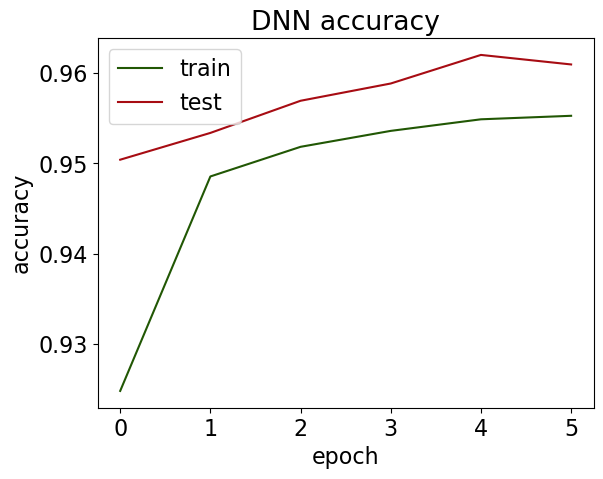

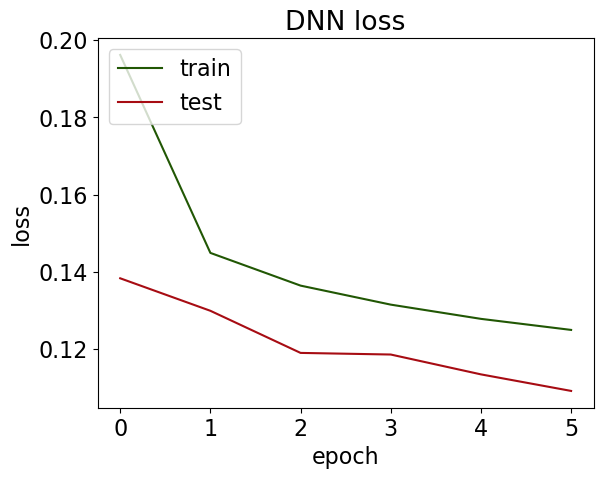

In [45]:
#plot for accuracy
plt.rcParams['font.size'] = 16
plt.plot(history_dnn.history['accuracy'], color='#215704')
plt.plot(history_dnn.history['val_accuracy'], color='#A70C13')
plt.title('DNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plot for loss
plt.plot(history_dnn.history['loss'], color='#215704')
plt.plot(history_dnn.history['val_loss'], color='#A70C13')
plt.title('DNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
y_pred = model_dnn.predict(x_test)

2029/2029 [==============================] - 3s 1ms/step


In [47]:
y_pred = list(map(lambda x: 0 if x<0.5 else 1, y_pred))

In [48]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [49]:
print("Scores:")
print("Accuracy - " + str(accuracy))
print("Precision - " + str(precision))
print("Recall - " + str(recall))
print("F1-score - " + str(f1_score))

Scores:
Accuracy - 0.9610513665916864
Precision - 0.9474501108647451
Recall - 0.9408578474546415
F1-score - 0.9441424720491405


In [50]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

In [51]:
metrics_list.append({'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1-score': f1,
                    'fpr': fpr,
                    'tpr': tpr})

In [52]:
metrics_list

[{'Accuracy': 0.6476134717899732,
  'Precision': 0.42918825561312607,
  'Recall': 0.021886559802712702,
  'F1-score': 0.04164920807843795,
  'fpr': array([0.        , 0.01566425, 1.        ]),
  'tpr': array([0.        , 0.02188656, 1.        ])},
 {'Accuracy': 0.9246140572520261,
  'Precision': 0.9129003847401845,
  'Recall': 0.8672714461863661,
  'F1-score': 0.8895011404439829,
  'fpr': array([0.        , 0.04452818, 1.        ]),
  'tpr': array([0.        , 0.86727145, 1.        ])},
 {'Accuracy': 0.9815271315440791,
  'Precision': 0.9751690010162153,
  'Recall': 0.9719482120838471,
  'F1-score': 0.9735559427449769,
  'fpr': array([0.        , 0.01331817, 1.        ]),
  'tpr': array([0.        , 0.97194821, 1.        ])},
 {'Accuracy': 0.987566634825748,
  'Precision': 0.9860624084513294,
  'Recall': 0.978289589571957,
  'F1-score': 0.9821606207308177,
  'fpr': array([0.        , 0.00744111, 1.        ]),
  'tpr': array([0.        , 0.97828959, 1.        ])},
 {'Accuracy': 0.987366

In [53]:
ML_DNN_models = ['Naive Bayes','Logistic Regression','Decision tree','Random Forest','XGBoost','CatBoost','DNN']

In [54]:
data_bar = pd.DataFrame(metrics_list, index=ML_DNN_models)

In [55]:
data_fpr_tpr = pd.DataFrame(metrics_list, index=ML_DNN_models)
data_fpr_tpr.drop(['Accuracy','Precision','Recall','F1-score'], axis=1, inplace=True)

In [56]:
data_bar.drop(['fpr','tpr'], axis=1, inplace=True)

In [57]:
tpr_list = data_fpr_tpr['tpr'].to_list()
fpr_list = data_fpr_tpr['fpr'].to_list()

In [58]:
auc_roc_list = []

In [59]:
for i in range(len(tpr_list)):
    auc_roc_list.append(metrics.auc(fpr_list[i], tpr_list[i]))

In [60]:
clrs2 = ['green',  'yellow', 'orange', 'red', 'blue', 'cyan', 'brown']

In [61]:
bar_plot_data = pd.DataFrame({
    "Accuracy": data_bar["Accuracy"].values,
    "Precision": data_bar["Precision"].values,
    "Recall": data_bar["Recall"].values,
    "F1-score": data_bar["F1-score"].values
    },
    index=["Naive Bayes","Logistic Regression","Decision tree","Random Forest","XGBoost","CatBoost","DNN"]
)

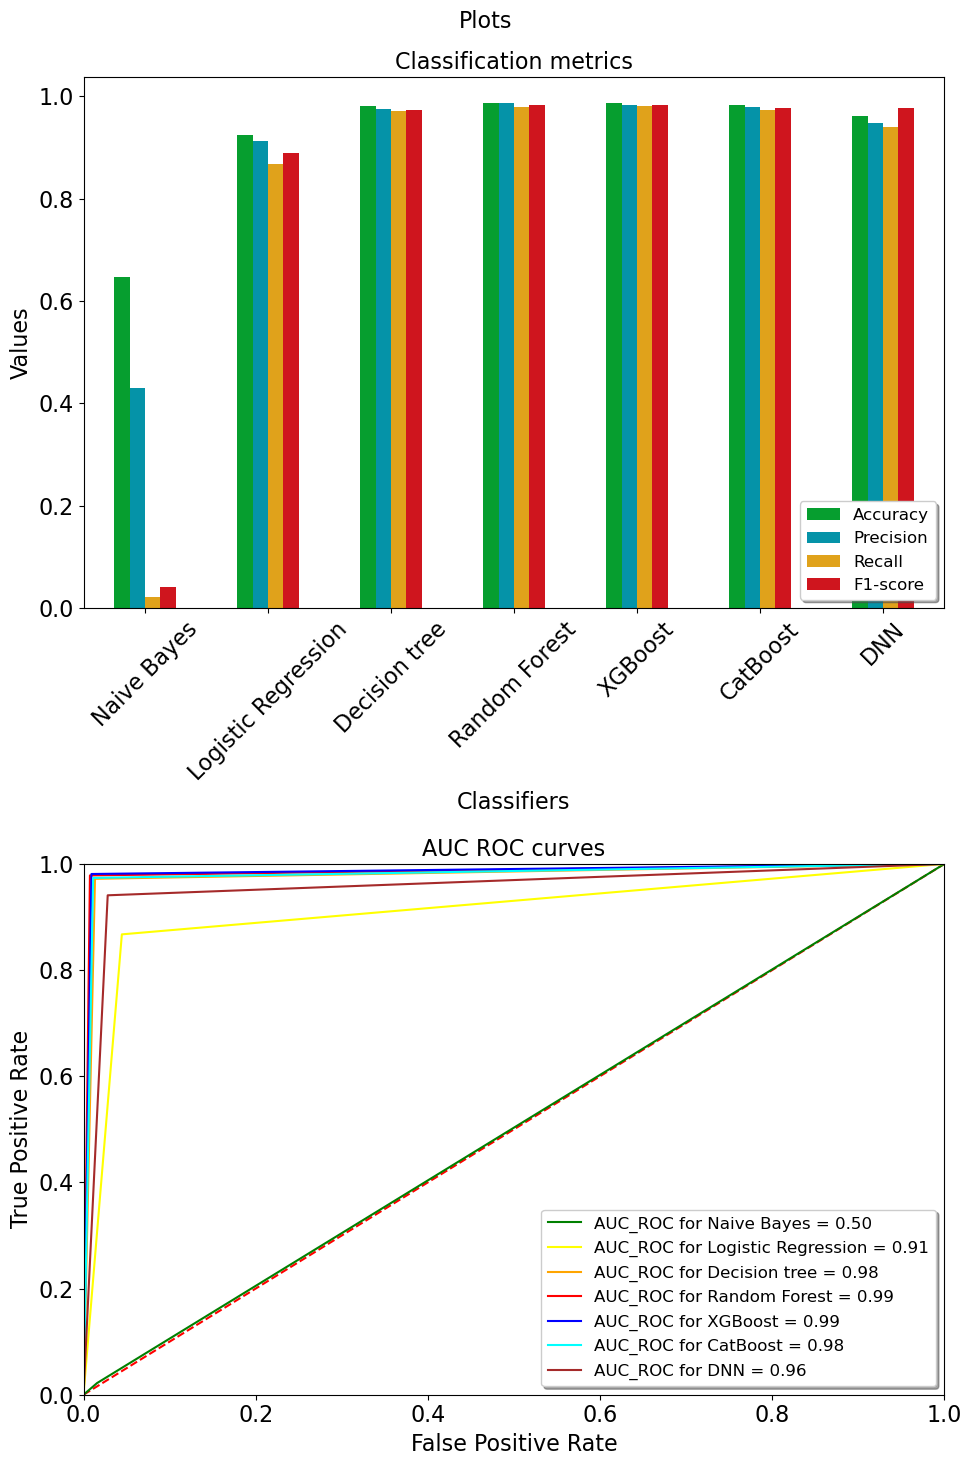

In [62]:
fig, axes = plt.subplots(2, 1, figsize=(10,15))
fig.suptitle('Plots', fontsize = 16)
axes[0].set_title('Classification metrics', fontsize = 16)
clrs = ['#069e2f',  '#0593a8', '#e0a21b', '#cf151e']
data_bar.plot(kind="bar", ax=axes[0], color=clrs, rot=45)
axes[0].set_xlabel('Classifiers', fontsize = 16)
axes[0].set_ylabel('Values', fontsize = 16)
axes[0].legend(loc = 'lower right', fancybox=True, fontsize=12, shadow = True)

axes[1].set_title('AUC ROC curves', fontsize = 16)
axes[1].plot([0, 1], [0, 1],'r--')
axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1])
axes[1].set_ylabel('True Positive Rate', fontsize = 16)
axes[1].set_xlabel('False Positive Rate', fontsize = 16)
for i in range(len(auc_roc_list)):
    axes[1].plot(fpr_list[i], tpr_list[i], clrs2[i], label = 'AUC_ROC for ' + ML_DNN_models[i] + ' = %0.2f' % auc_roc_list[i])

axes[1].legend(loc = 'lower right', fancybox=True, fontsize=12, shadow = True)
fig.tight_layout()
plt.show()